In [2]:
### jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint

import pandas as pd
newscode = pd.read_csv("code_url.csv")
pprint(newscode)

     code                                               url  \
0       1                    http://www.abcpolitiko.com.br/   
1       2                        https://agitabrasilia.com/   
2       3                  https://www.reportermalu.com.br/   
3       4                         http://blogdocallado.com/   
4       5             https://chiquinhodornas.blogspot.com/   
5       6                         https://eldogomes.com.br/   
6       7                          http://fredlima.blog.br/   
7       8                        http://hudsoncunha.com.br/   
8       9                    https://brasiliadefato.com.br/   
9      10                        http://brasiliainfoco.com/   
10     11               https://www.colunaesplanada.com.br/   
11     12                    https://colunapolitica.com.br/   
12     13                  https://conectadoaopoder.com.br/   
13     14            https://www.correiobraziliense.com.br/   
14     15                     http://www.correioweb.com

In [42]:
# Open matrix H
df_document_topic = pd.read_csv("document_topic.csv")

         Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
0          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
1          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
2          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
3          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
4          0.00     0.0     0.0    0.01    0.00     0.0     0.0     0.0   
5          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
6          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
7          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
8          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
9          0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
10         0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
11         0.00     0.0     0.0    0.00    0.00     0.0     0.0     0.0   
12         0.00     0.0  

In [82]:
# Group data by day and city
df_topic_by_day = df_doc_topic.groupby(['city','date'])

topic_sum = df_topic_by_day.sum().drop(columns=['dominant_topic'])
dominant_topic = df_topic_by_day['dominant_topic'].apply(list)
documents = df_topic_by_day['document'].apply(list)
newspaper = df_topic_by_day['newspaper'].apply(list)

df = pd.concat([topic_sum,dominant_topic,documents,newspaper],axis=1)

                      Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  \
city      date                                                                 
Brasilia  2018-12-11    0.11    0.00    0.00    1.07    0.00    0.01    0.08   
          2018-12-12    0.47    0.00    1.99    2.77    0.11    0.01    0.59   
          2018-12-13    0.93    0.00    3.98    5.36    0.17    0.00    1.01   
          2018-12-14    0.53    0.00    3.11    2.62    0.18    0.00    0.39   
          2018-12-15    0.53    0.00    2.20    2.80    0.18    0.00    0.43   
          2018-12-16    0.47    0.00    2.19    2.38    0.16    0.01    0.48   
          2018-12-17    0.49    0.00    2.14    2.21    0.17    0.00    0.41   
          2018-12-18    0.45    0.00    2.04    2.89    0.11    0.00    0.40   
          2018-12-19    0.46    0.00    1.97    2.54    0.04    0.00    0.36   
          2018-12-20    0.39    0.00    1.87    2.43    0.07    0.00    0.32   
          2018-12-22    0.26    0.00    

In [107]:
# Slice dataset by city
br = df.loc[df['city'] == 'Brasilia'].drop(columns=['dominant_topic','document','newspaper']).set_index('date')
sp = df.loc[df['city'] == 'Sao Paulo'].drop(columns=['dominant_topic','document','newspaper']).set_index('date')
rj = df.loc[df['city'] == 'Rio de Janeiro'].drop(columns=['dominant_topic','document','newspaper']).set_index('date')
fo = df.loc[df['city'] == 'Fortaleza'].drop(columns=['dominant_topic','document','newspaper']).set_index('date')
sa = df.loc[df['city'] == 'Salvador'].drop(columns=['dominant_topic','document','newspaper']).set_index('date')

# Normalize by population
filter_col = [col for col in br if col.startswith('Topic')]
br[filter_col] = br[filter_col].divide(2.974703)
sp[filter_col] = sp[filter_col].divide(12.176866)
rj[filter_col] = rj[filter_col].divide(6.688927)
fo[filter_col] = fo[filter_col].divide(2.643247)
sa[filter_col] = sa[filter_col].divide(2.857329)

            Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
date                                                                         
2018-12-11    0.11     0.0    0.00    1.07    0.00    0.01    0.08     0.0   
2018-12-12    0.47     0.0    1.99    2.77    0.11    0.01    0.59     0.0   
2018-12-13    0.93     0.0    3.98    5.36    0.17    0.00    1.01     0.0   
2018-12-14    0.53     0.0    3.11    2.62    0.18    0.00    0.39     0.0   
2018-12-15    0.53     0.0    2.20    2.80    0.18    0.00    0.43     0.0   
2018-12-16    0.47     0.0    2.19    2.38    0.16    0.01    0.48     0.0   
2018-12-17    0.49     0.0    2.14    2.21    0.17    0.00    0.41     0.0   
2018-12-18    0.45     0.0    2.04    2.89    0.11    0.00    0.40     0.0   
2018-12-19    0.46     0.0    1.97    2.54    0.04    0.00    0.36     0.0   
2018-12-20    0.39     0.0    1.87    2.43    0.07    0.00    0.32     0.0   
2018-12-22    0.26     0.0    0.68    2.45    0.05    0.01    0.

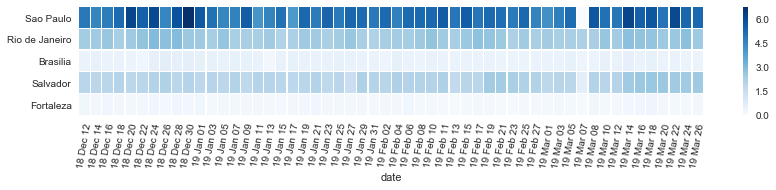

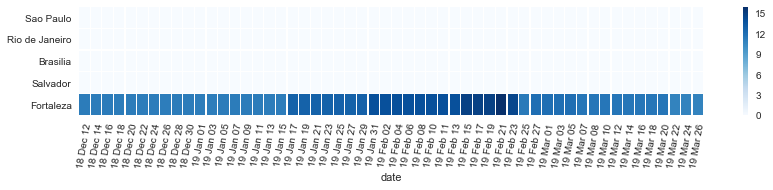

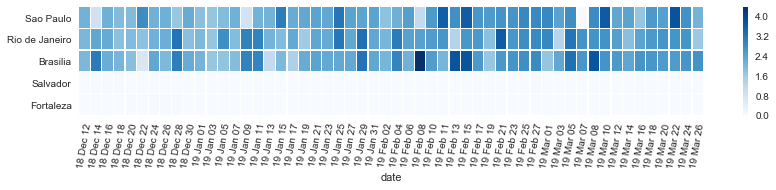

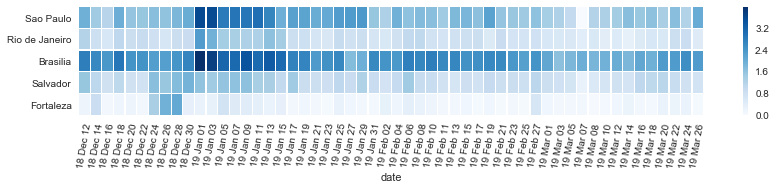

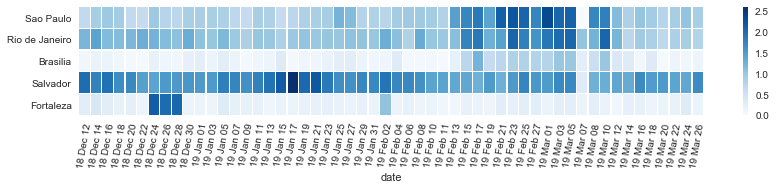

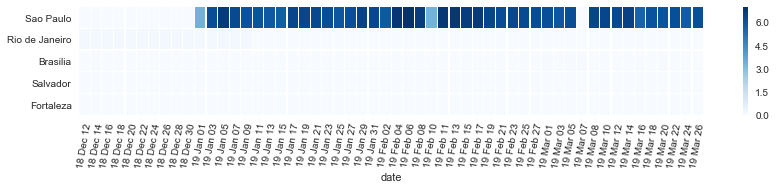

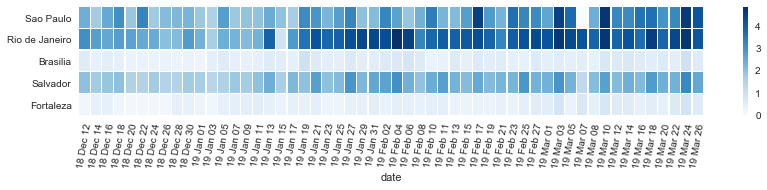

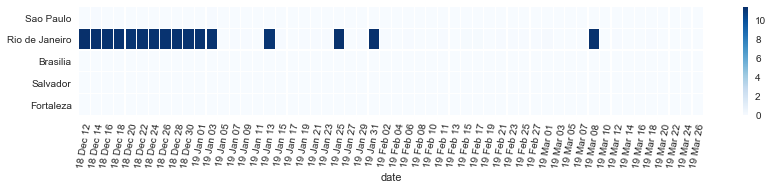

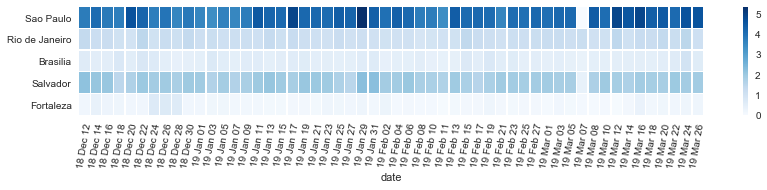

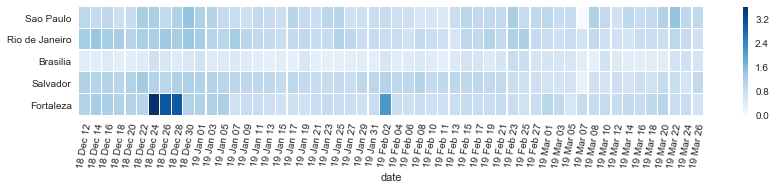

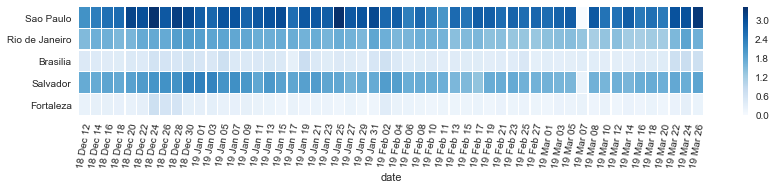

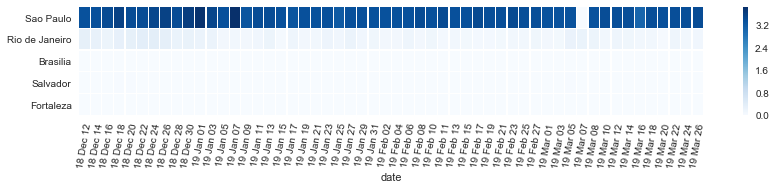

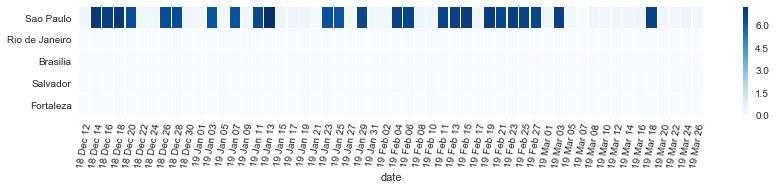

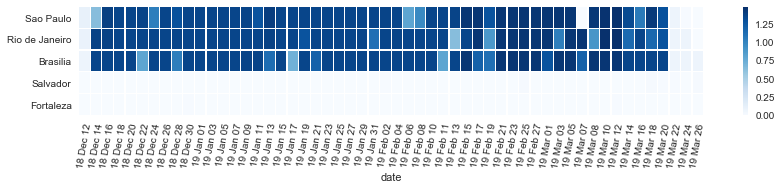

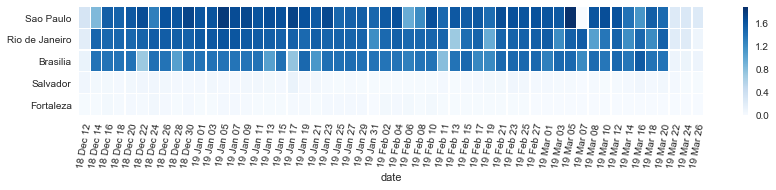

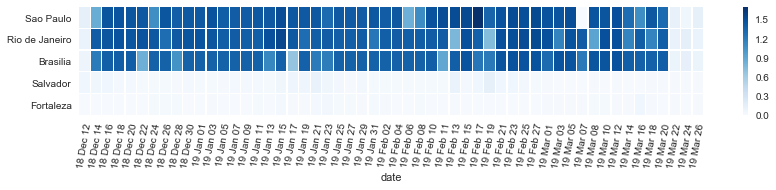

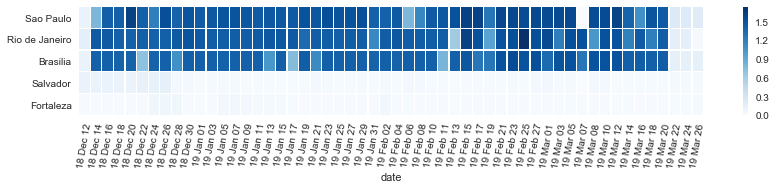

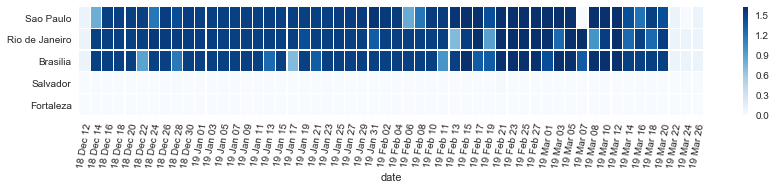

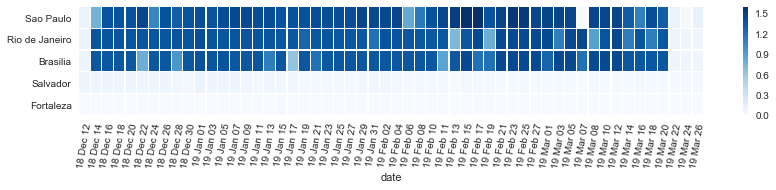

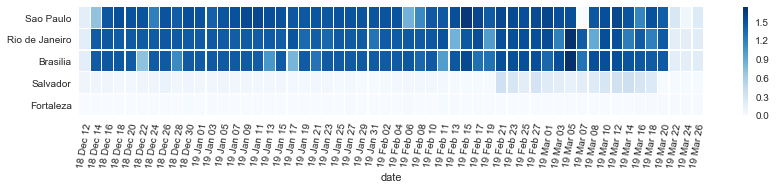

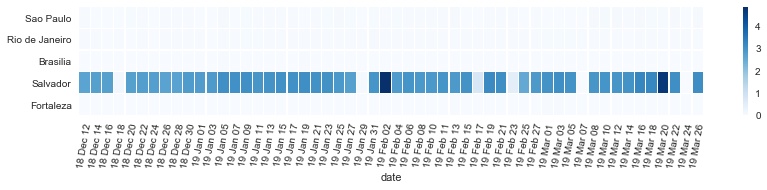

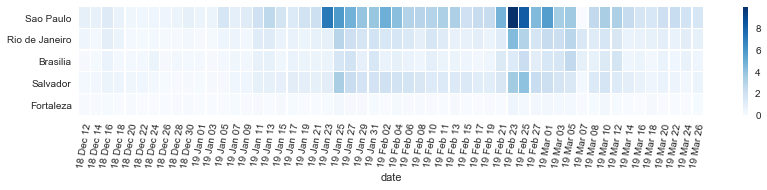

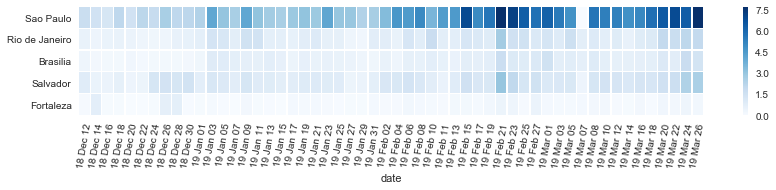

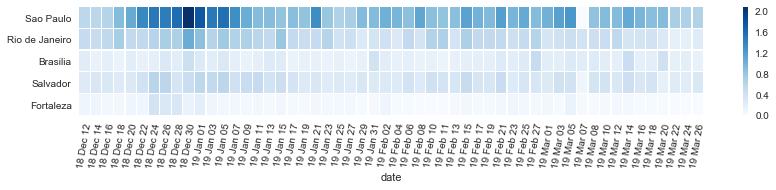

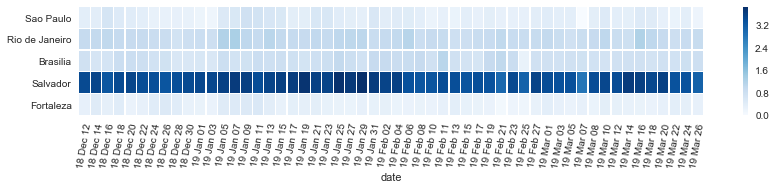

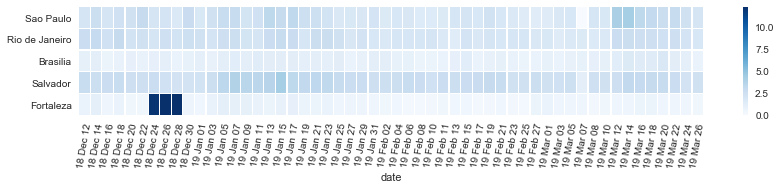

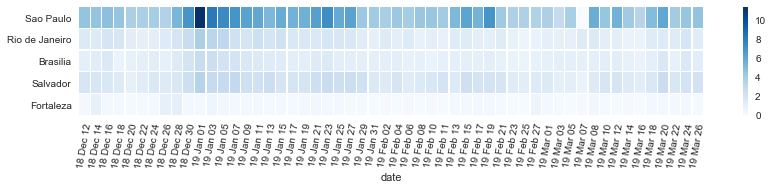

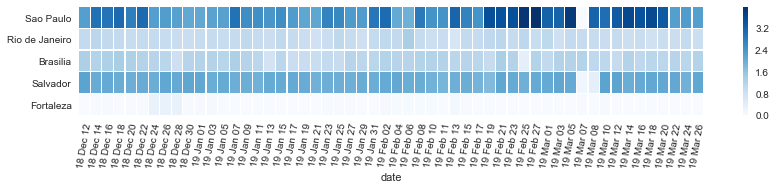

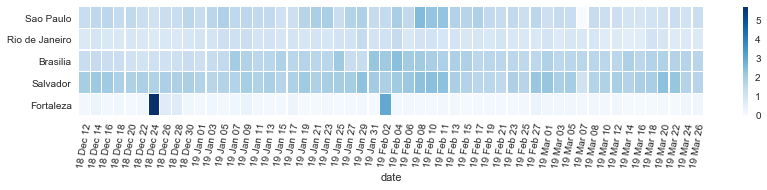

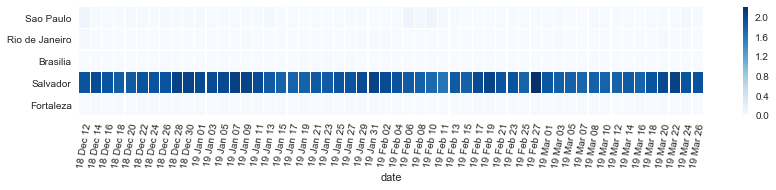

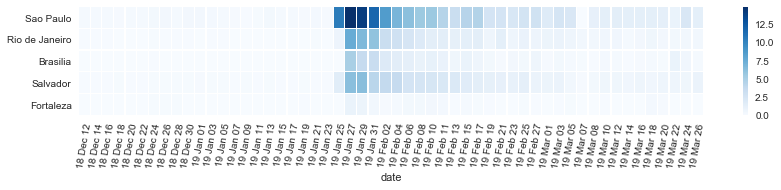

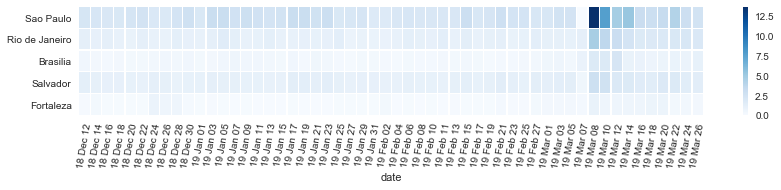

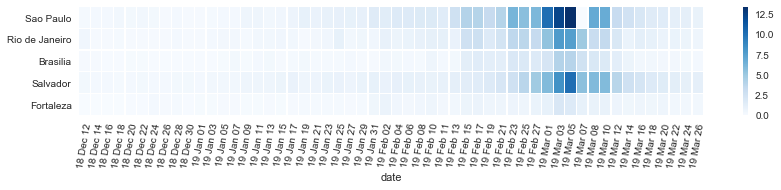

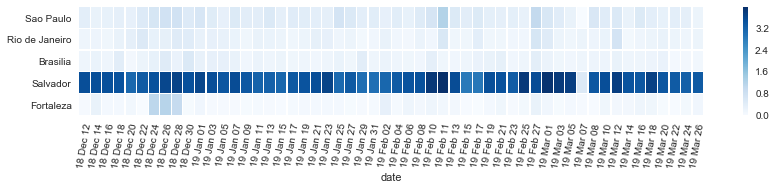

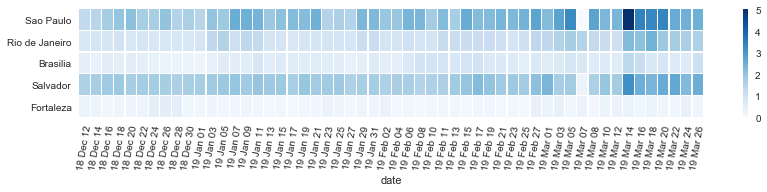

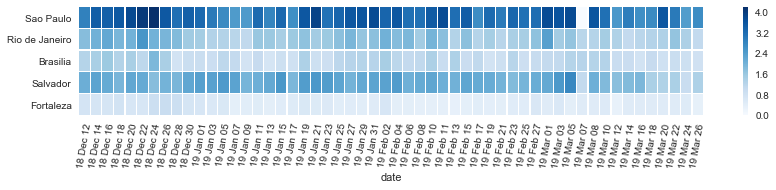

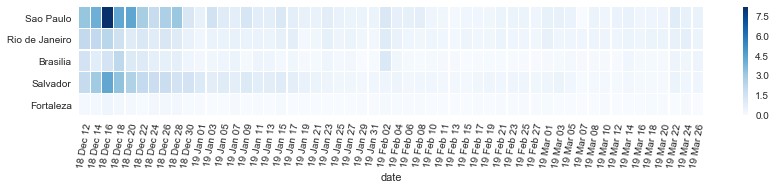

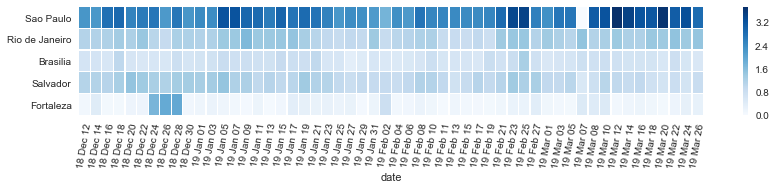

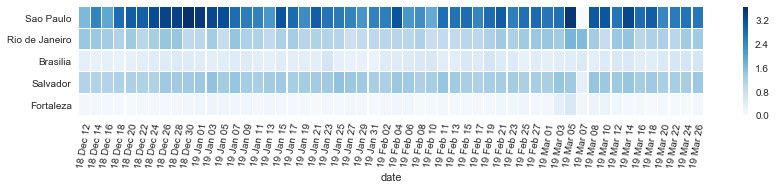

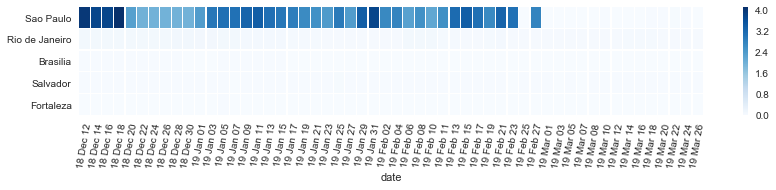

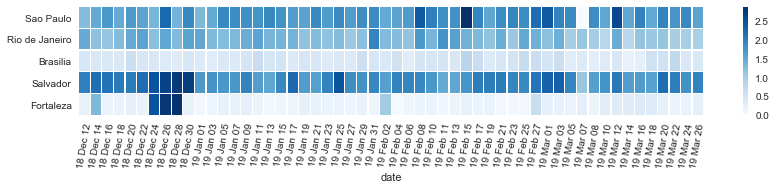

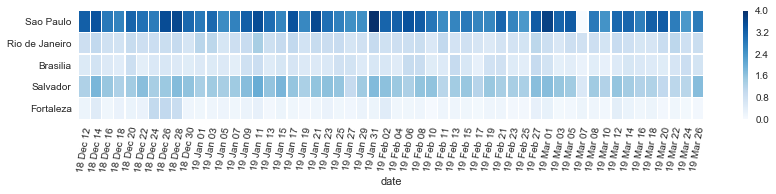

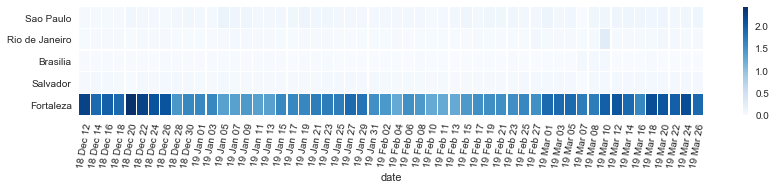

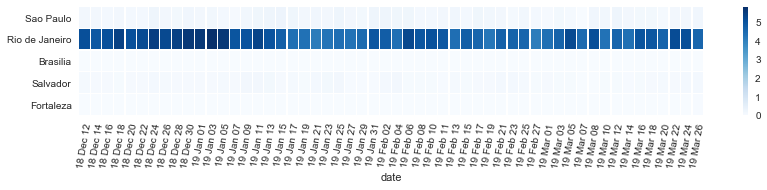

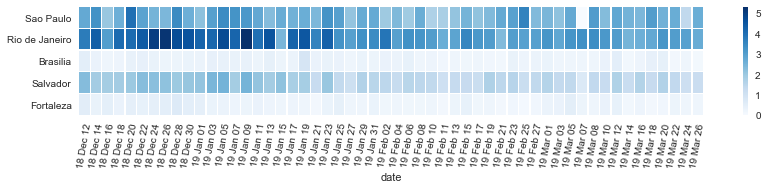

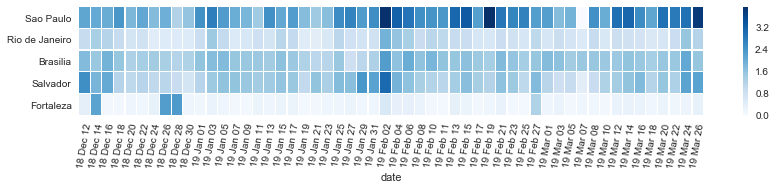

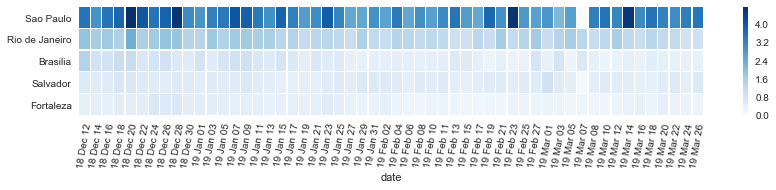

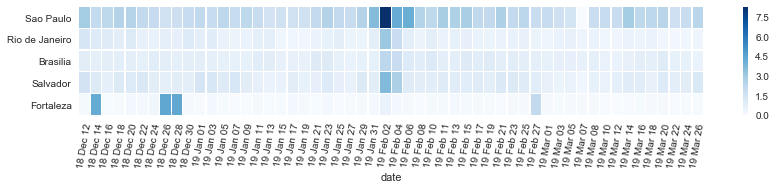

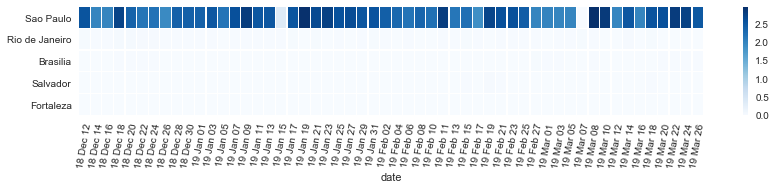

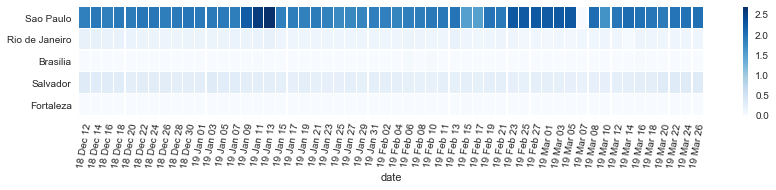

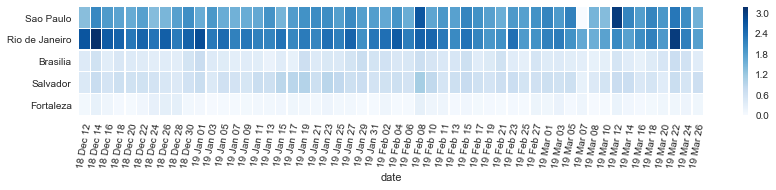

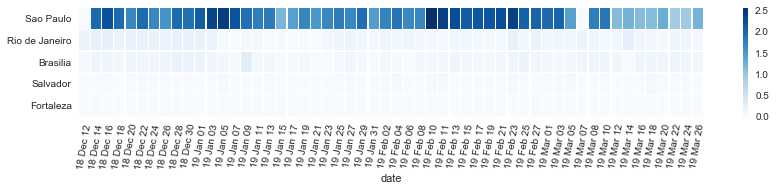

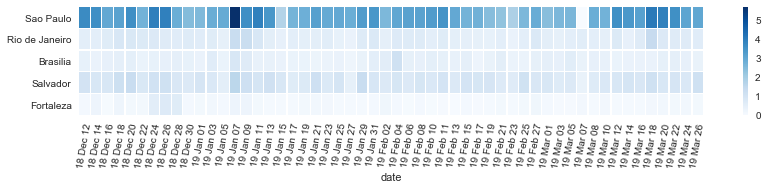

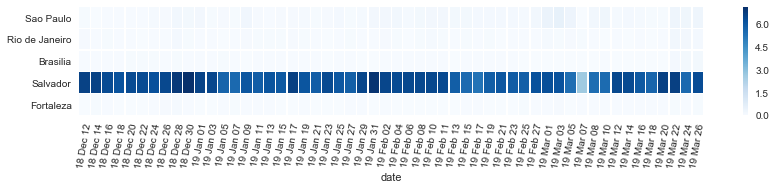

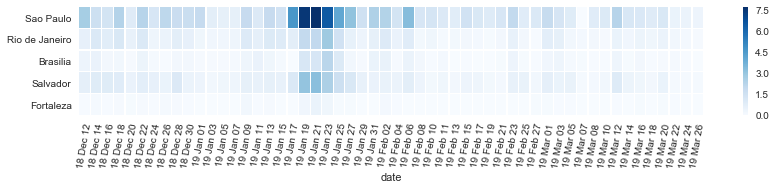

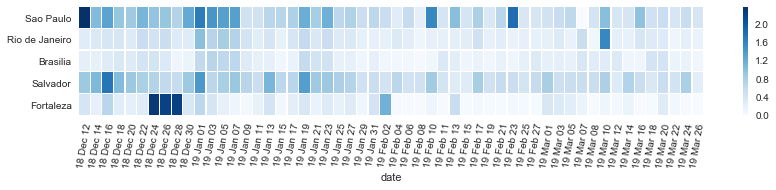

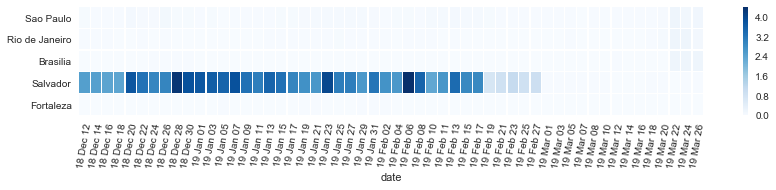

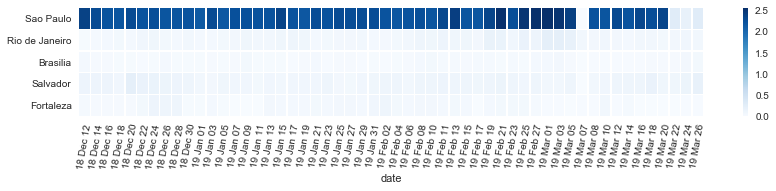

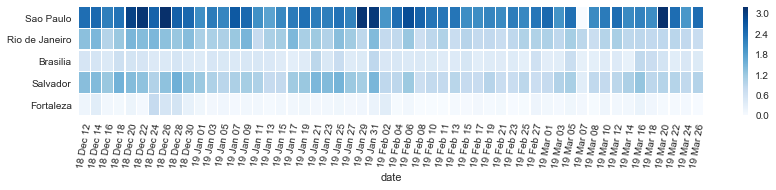

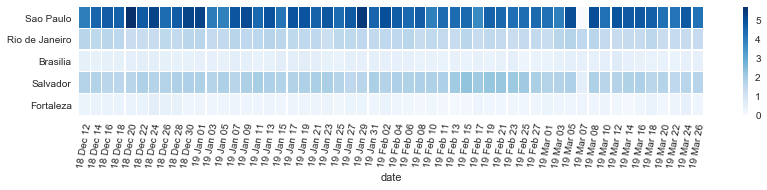

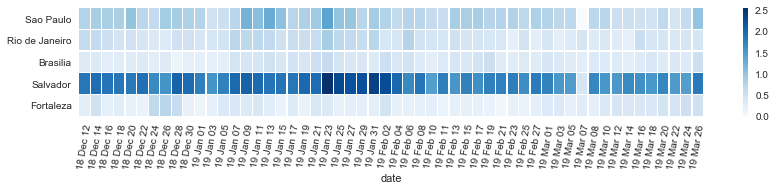

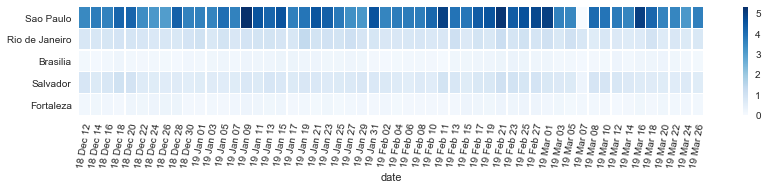

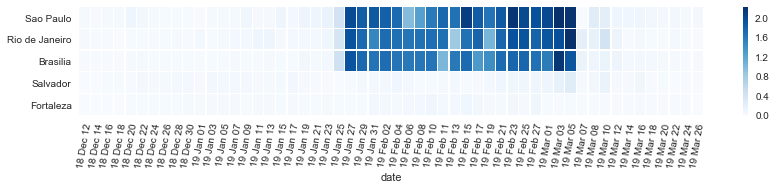

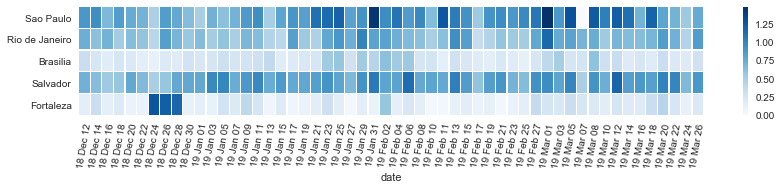

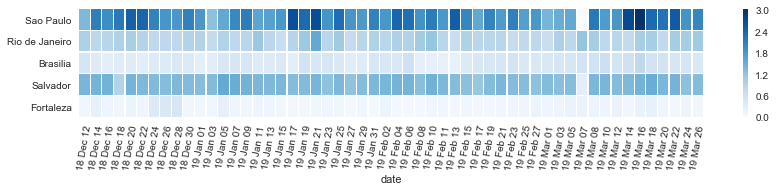

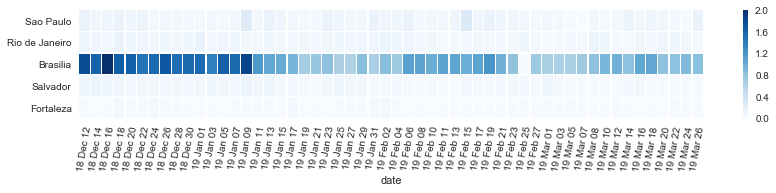

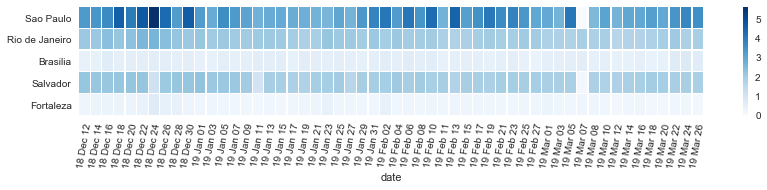

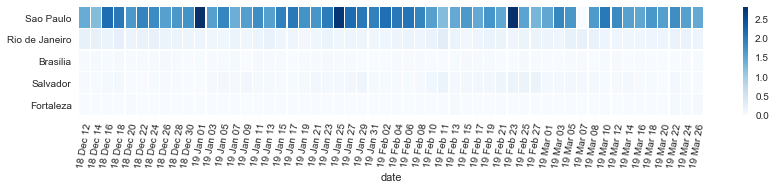

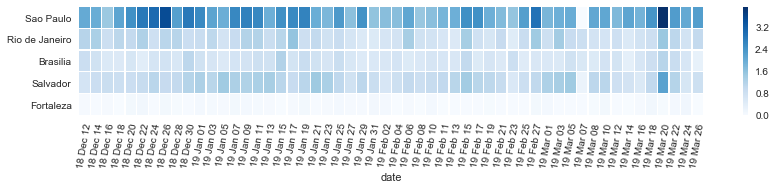

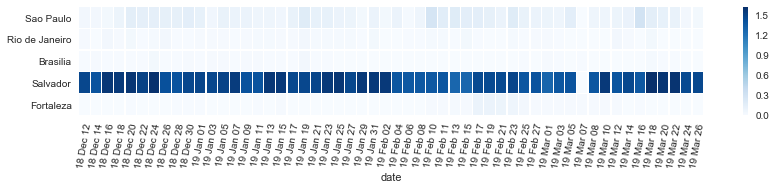

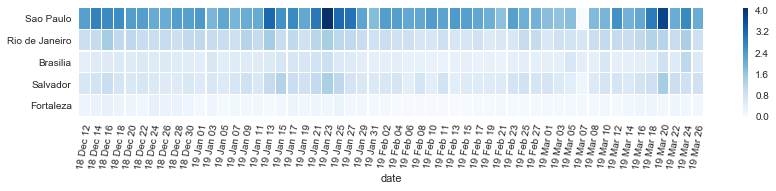

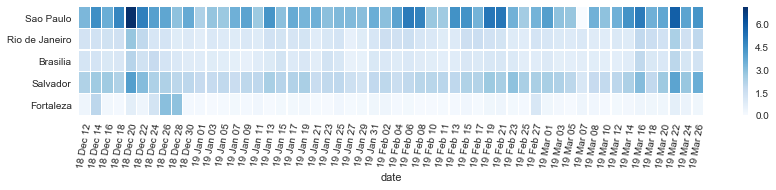

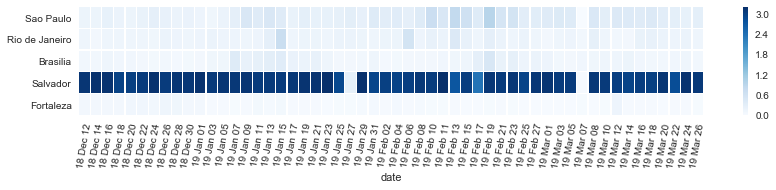

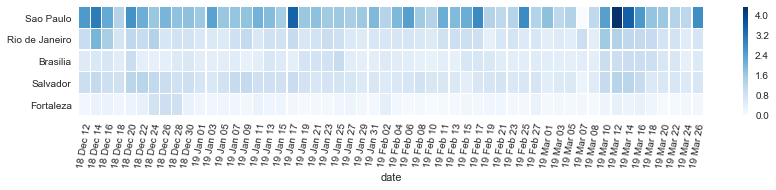

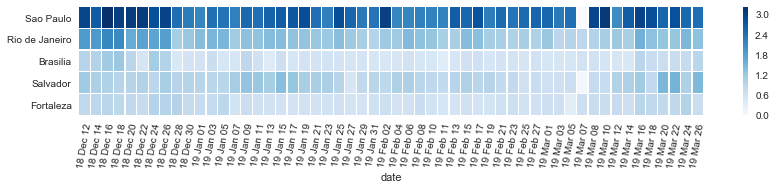

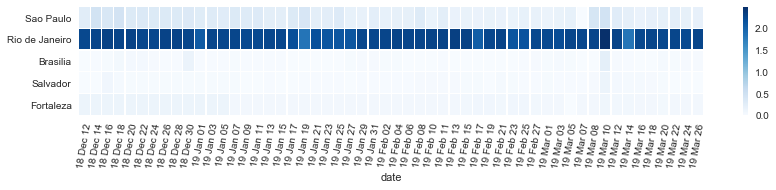

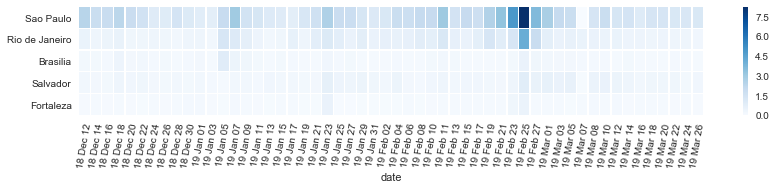

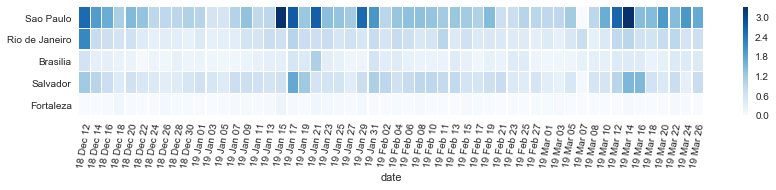

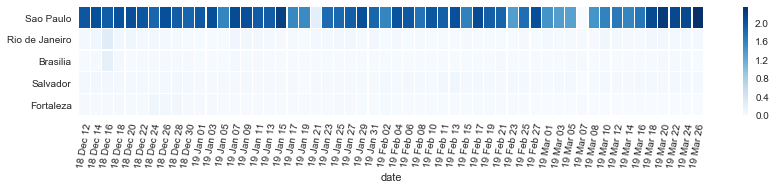

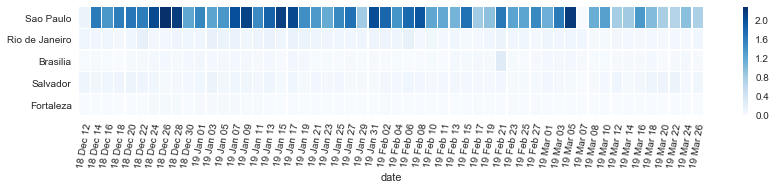

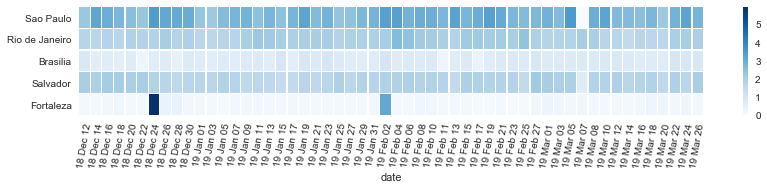

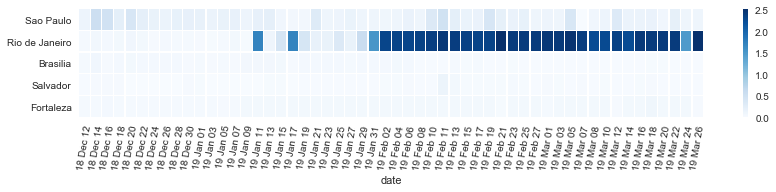

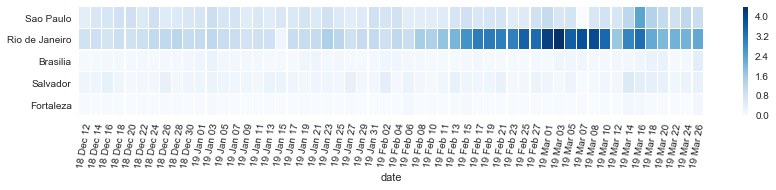

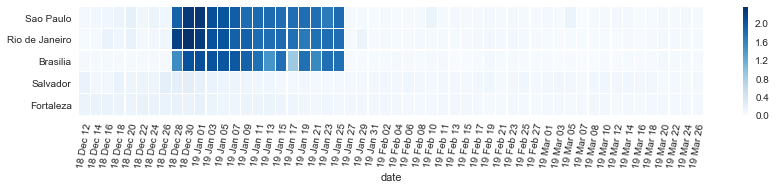

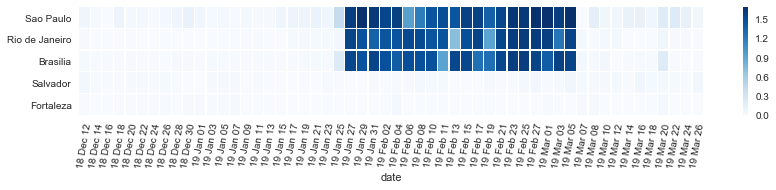

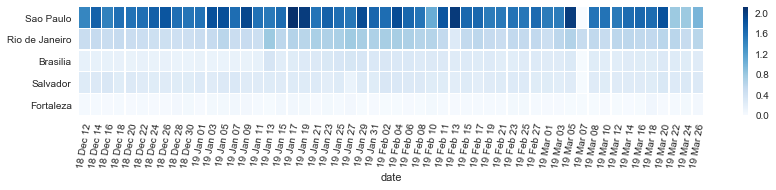

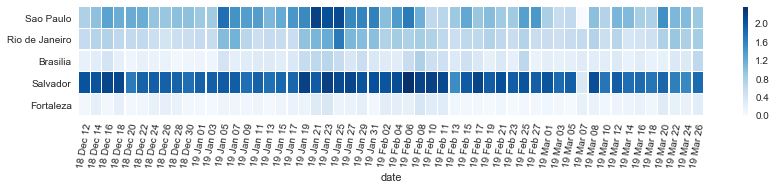

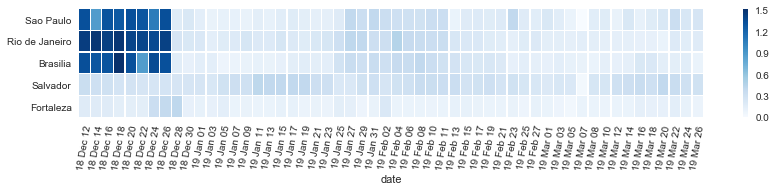

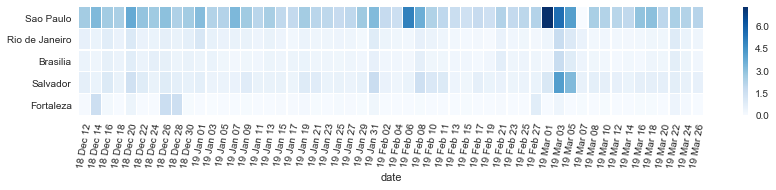

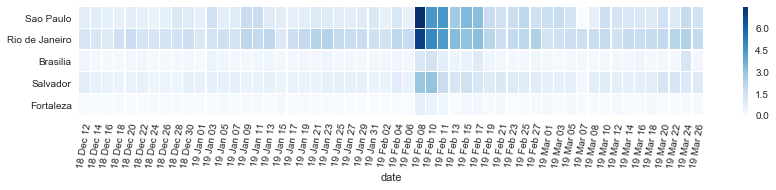

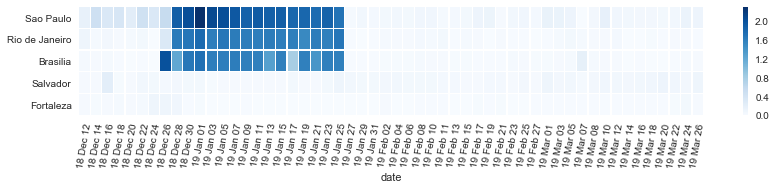

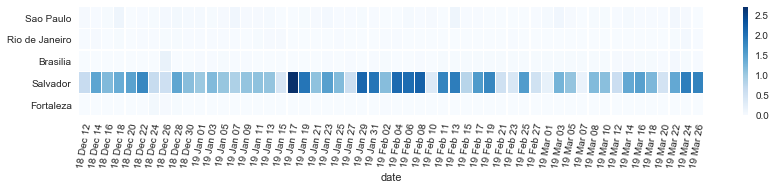

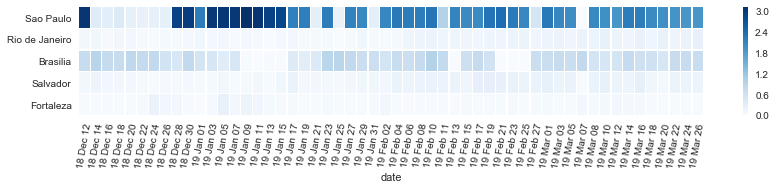

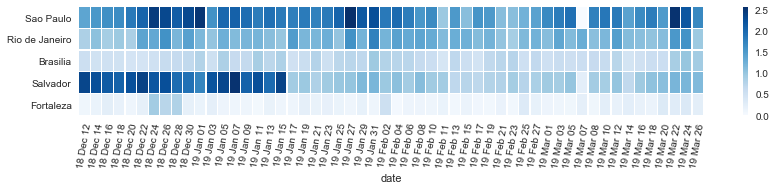

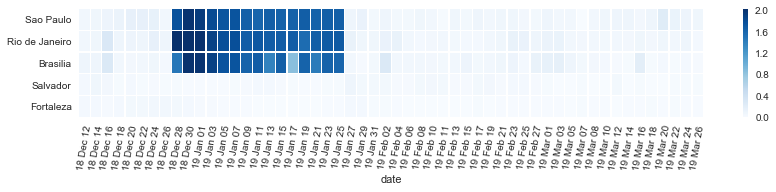

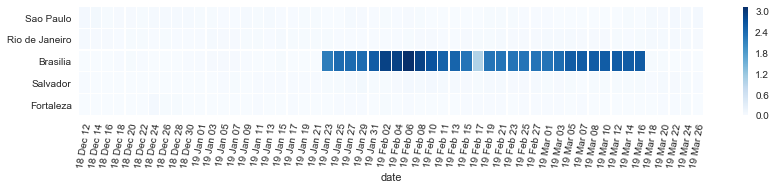

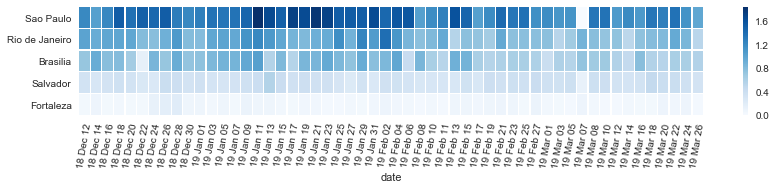

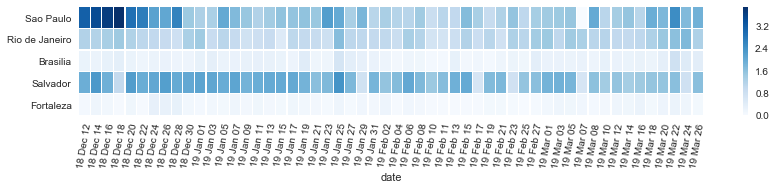

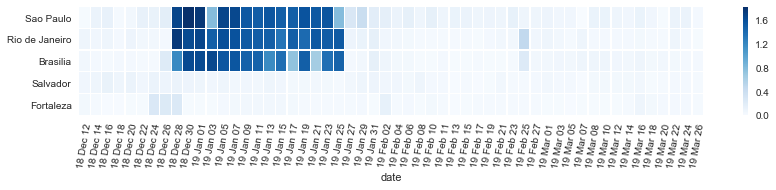

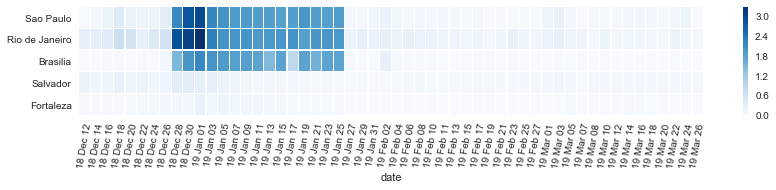

In [201]:
# Create and save plots (range = number of topics)
for i in range(100):
    
    x = "Topic"+str(i)

    TopicX = pd.concat([sp[x],rj[x],br[x],sa[x],fo[x]],axis=1)
    TopicX.columns = ["Sao Paulo", "Rio de Janeiro", "Brasilia", "Salvador", "Fortaleza"]
    TopicX = TopicX.fillna(0)

    t = TopicX.T
    new = t.fillna(0)
    res = new.div(new.max(axis=1), axis=0)
    TopicX_T = pd.Series(list(res))

    plt.figure(figsize=(14,2))
    sns.set()
    g = sns.heatmap(new, cmap="Blues", linewidths=.2)
    g.set_xticklabels(TopicX_T.dt.strftime('%y %b %d'))
    plt.xticks(rotation=80)

    plt.show()

    g.figure.savefig(x+".pdf", bbox_inches='tight')